In [1]:
from typing import Union, Optional, List

import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from models import gora2021
import utils as u
import pandas as pd
from steps import preprocess
from visualization import papermode

papermode(plt, size=12)


In [2]:
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S28", "S29", "S30", "S31")
# abbrs = ("S06", "S07", "S08", "S09", "S10", "S28", "S29", "S30", "S31")
# abbrs = ("S01", "S02", "S03", "S04", "S05", "S06", "S07", "S08", "S09", "S10", "S21", "S22","S23", "S28", "S29", "S30", "S31")
# abbrs = (*abbrs, "D05", "D11", "D18", "D19", "D20", "D21", "D22")
# abbrs = ("M01", "M02", "M03", "M04", "M05", "M06", "M07")
abbrs = ("M03", "M04", "M05", "M06")
colors = u.COLORS
cols = {a: colors[u.get_terrain(a)] for a in abbrs}

highlighted_abbrs = ("M03", "M04", "M05", "M06")
highlighted_abbrs = ("S23",)


def add_terrain_legend(mpl_elem: Union[mpl.axes.Axes, mpl.figure.Figure], highlighted: Optional[List[str]] = None):
    legend_handles = [mpatches.Patch(color=col, label=lab) for lab, col in colors.items()]
    if highlighted is not None:
        legend_handles.extend([mpatches.Patch(color="xkcd:bright red", label=lab) for lab in highlighted])
    # mpl_elem.legend(handles=legend_handles, bbox_to_anchor=(1.05, 0), loc="lower left")
    mpl_elem.legend(
        handles=legend_handles, ncol=len(colors), bbox_to_anchor=(0.5, -0.03), loc="upper center", title="Terrain"
    )

In [3]:
dfs = {}
for abbr in abbrs:
    preprocess(abbr, verbose=False)
    gora_df = gora2021.gora2021(abbr, verbose=False)
    dfs[abbr] = gora_df


M06: 100%|██████████| 137/137 [00:01<00:00, 113.23it/s]


In [4]:
model_name = gora2021.__MODEL_NAME__.lower()
figdir = u.get_figdir("summary", subdir=model_name)
model_name = gora2021.__MODEL_NAME__.title()


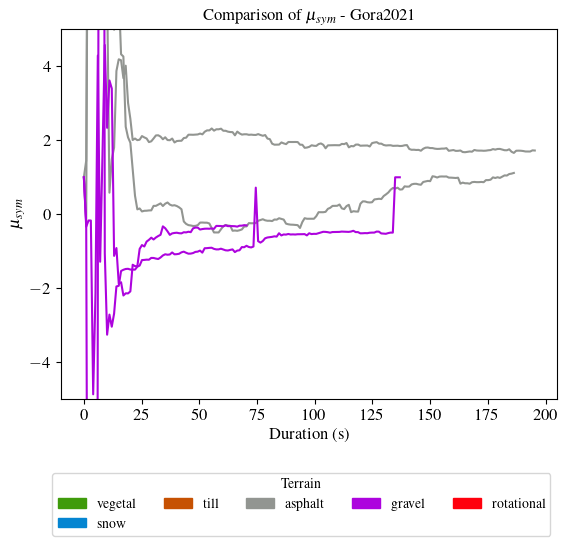

In [5]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_sym, col, label=abbr)
ax.set_ylim((-5, 5))
add_terrain_legend(fig, highlighted=["rotational"])
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{sym}$")
ax.set_title(f"Comparison of $\mu_{{sym}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}.jpg", bbox_inches="tight")


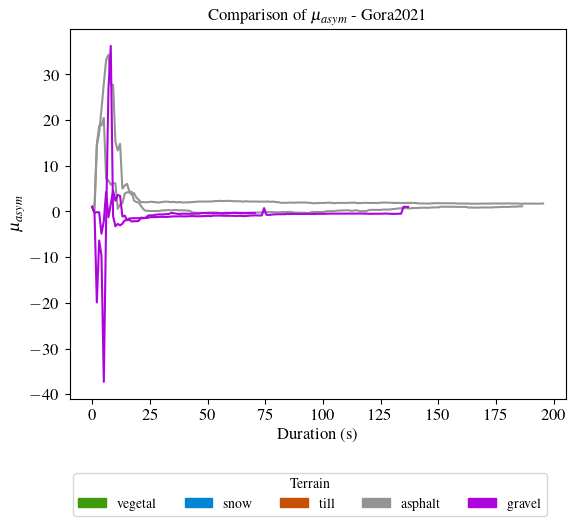

In [6]:
fig, ax = plt.subplots()

for abbr in abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].m_asym, col, label=abbr)
# ax.set_ylim((-2000, 8000))
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$\mu_{asym}$")
ax.set_title(f"Comparison of $\mu_{{asym}}$ - {model_name}")

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}.jpg", bbox_inches="tight")

AttributeError: 'DataFrame' object has no attribute 'Bs_naive'

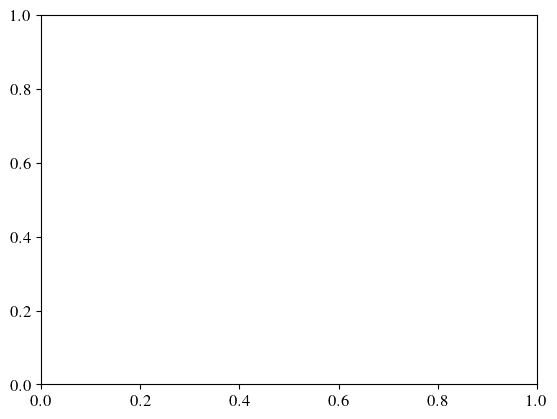

In [7]:
fig, ax = plt.subplots()

rot_abbrs = ("M03", "M04", "M05", "M06")
highlighted_abbrs = ("S23,")

for abbr in rot_abbrs:
    col = cols[abbr]
    col = "r" if abbr in highlighted_abbrs else col
    ax.plot(dfs[abbr].time_rel, dfs[abbr].Bs_naive, col, label=abbr)
ax.set_ylim((0, 2.5))
add_terrain_legend(fig)
# add_terrain_legend(fig, highlighted=["rotational"])
ax.set_xlabel("Duration (s)")
ax.set_ylabel("$B_S$")
ax.set_title(f"{' vs '.join(abbrs)} - Naive $B_S$ - {model_name}")
ax.grid(visible=True, which="minor")
ax.minorticks_on()

fig.savefig(figdir / f"{''.join(abbrs)}_{model_name}_rot.jpg", bbox_inches="tight")